импорт необходимых библиотек для выполнения домашнего задания


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

загрузка учебного датасета

In [3]:
df = pd.read_csv("S02-hw-dataset.csv")

Вывод первых строк датасета


In [8]:
df.head()

,user_id,age,country,purchases,revenue
0,1,25.0,FR,7,749
1,2,24.0,RU,5,1115
2,3,52.0,FR,7,399
3,4,31.0,RU,6,654
4,5,NaN,DE,6,1296


информация о датасете

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   user_id    41 non-null     int64  
 1   age        39 non-null     float64
 2   country    41 non-null     object 
 3   purchases  41 non-null     int64  
 4   revenue    41 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 1.7+ KB


описательные статистики

In [10]:
df.describe()


,user_id,age,purchases,revenue
count,41.000000,39.000000,41.000000,41.000000
mean,20.243902,36.512821,4.829268,820.048780
std,11.659289,18.304259,2.710189,613.127269
min,1.000000,5.000000,-1.000000,0.000000
25%,10.000000,24.000000,3.000000,432.000000
50%,20.000000,33.000000,5.000000,693.000000
75%,30.000000,45.500000,7.000000,1115.000000
max,40.000000,120.000000,11.000000,2475.000000


Описательные статистики для  категориальных данных


In [ ]:
df.describe(include=['object'])

подсчет доли пропусков  в каждом столбце(в процентах)
Видим что пропуски есть в столбце age

In [11]:

df.isna().mean()*100

user_id      0.000000
age          4.878049
country      0.000000
purchases    0.000000
revenue      0.000000
dtype: float64

Проверка на полностью дублирующие строки(сумма) Видим, что есть только одна такая скрока

In [13]:
df.duplicated().sum()

np.int64(1)

Проверяем какие строчки совпадают

In [24]:
df[df.duplicated('user_id', keep=False)]

,user_id,age,country,purchases,revenue
9,10,24.0,RU,7,511
40,10,24.0,RU,7,511


Проверяем датасет на подозрительные случаи

Проверяем возраст на слишком большой и отрицательный

In [17]:
print(f"Возраст >100: {len(df[df['age'] > 100])}")
print(f"Отрицательный возраст: {len(df[df['age'] < 0])}")

Возраст >100: 1
Отрицательный возраст: 0


In [27]:
df[df['age'] > 100]

,user_id,age,country,purchases,revenue
5,6,120.0,FR,-1,785


Проверяем отрицательные покупки

In [18]:
print(f"Отрицательные покупки: {len(df[df['purchases'] < 0])}")

Отрицательные покупки: 1


In [19]:
df[df['purchases'] < 0]

,user_id,age,country,purchases,revenue
5,6,120.0,FR,-1,785


Проверяем отрицательный доход

In [20]:
print(f"Отрицательный доход: {len(df[df['revenue']<0])}")

Отрицательный доход: 0


Проверяем на нулевые покупки с доходом и на нулевой доход с покупками

In [25]:
print(f"Нулевые покупки с доходом: {len(df[(df['purchases'] == 0) & (df['revenue'] > 0)])}")
print(f"Покупки с нулевым доходом: {len(df[(df['purchases'] > 0) & (df['revenue'] == 0)])}")

Нулевые покупки с доходом: 0
Покупки с нулевым доходом: 1


In [26]:
df[(df['purchases'] > 0) & (df['revenue'] == 0)]

,user_id,age,country,purchases,revenue
10,11,24.0,US,4,0


В ходе анализа качества данных были выявлены следующие проблемы. 
В столбце age 4,88 % пропущенных значений.
Найдена 1 полностью дублирующая строка(user_id 10).
Также были найдено несколько аномальных значений:
    1 запись с возрастом >100 лет(id 6)
    1 записть с отрицательным значением покупок(id 6)
    1 запись с положительным значением покупок, но нулевым доходом(id 11)


Базовый EDA: группировки, агрегаты и частоты

Посчитываем частоту категориальной переменной(country)

In [28]:
df['country'].value_counts()

country
RU    13
FR    12
US     8
DE     6
CN     2
Name: count, dtype: int64

Группировка через groupby

Вычисление среднего возраста для каждой страны

In [30]:
df.groupby('country')['age'].mean()

country
CN    24.000000
DE    34.600000
FR    46.250000
RU    30.076923
US    36.714286
Name: age, dtype: float64

Статистика по покупкам по странам( среднее, сумма, медиана)

In [31]:
df.groupby('country')['purchases'].agg(['mean', 'sum', 'median']).round(2)

,mean,sum,median
country,,,
CN,4.50,9,4.5
DE,6.50,39,6.0
FR,4.25,51,6.0
RU,4.77,62,6.0
US,4.62,37,4.0


Статистика по доходу по странам(среднее, сумма, max, min)

In [32]:
df.groupby('country')['revenue'].agg(['mean', 'sum', 'max','min']).round(2)

,mean,sum,max,min
country,,,,
CN,1054.00,2108,1652,456
DE,1445.50,8673,2475,702
FR,675.92,8111,1608,0
RU,790.08,10271,2086,0
US,557.38,4459,980,0


Анализ датасета по возрастным группам

Разделяем возраст на интервалы

In [6]:
df['age_group'] =pd.cut(df['age'], bins=[0, 18, 25, 35, 45, 55, 100, 150],labels=['<18', '18-25', '26-35', '36-45', '46-55', '56-100', '>100'])


In [31]:
age_group_stats = df.groupby('age_group',observed=False).agg({
    'user_id': 'count',  #кол-во записей для каждого интервала
    'purchases': ['mean', 'sum'], #среднее и сумма покупок для каждого возрастного интервала
    'revenue': ['mean', 'sum'] #среднее и сумма дохода для каждого возрастного интервала
}).round(2)
print(age_group_stats)

          user_id purchases      revenue       
            count      mean sum     mean    sum
age_group                                      
<18             2      6.00  12  1296.00   2592
18-25          10      5.00  50   581.60   5816
26-35          11      4.91  54   946.82  10415
36-45           6      4.83  29  1106.00   6636
46-55           8      4.00  32   594.88   4759
56-100          1      7.00   7   693.00    693
>100            1     -1.00  -1   785.00    785


Основные наблюдения: По странам доминируют Россия(13 записей), Франци(12), тогда как Китай имеет всего 2 записи. По средним показателям видно, что в Германии демонстрируют наивысший средний доход (1445.5) и наибольшее количество покупок (6.5), в то время как пользователи из США имеют самый низкий средний доход (557.38), несмотря на среднее количество покупок. Пользователи из Франции имеют самый высокий средний возраст (46.25 лет), при том что отсальные средние возраста по странам находятся между 24-36 лет. 
Наибольшее количество пользователей сосредоточено в возрастных группах 26-35 лет (11 пользователей) и 18-25 лет (10 пользователей), что составляет более половины всей базы. Наблюдается интересная динамика по доходу - пользователи группы 36-45 лет демонстрируют почти наивысший средний доход (1106.0), хотя имеют среднее количество покупок (4.83). При этом группа 26-35 лет генерирует наибольший суммарный доход (10415), сочетая хорошее количество пользователей и высокий средний доход. Также интересно, что самая молодая группа "<18" показывает высокий средний доход (1296.0), превосходя многие взрослые группы.
        

Визуализация данных в Matplotlib

Гистограмма

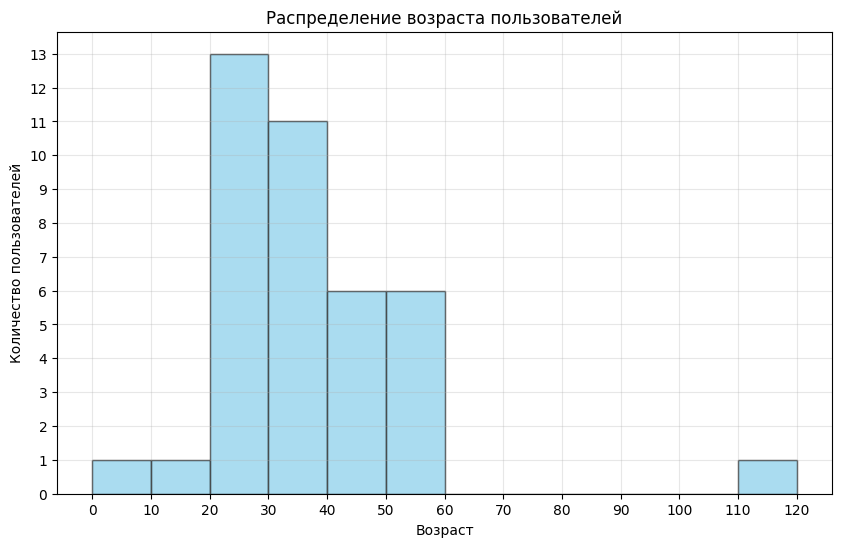

In [7]:
plt.figure(figsize=(10, 6))
plt.hist(df['age'].dropna(), bins=range(0, 121, 10), color='skyblue', edgecolor='black', alpha=0.7)
plt.xlabel('Возраст')
plt.ylabel('Количество пользователей')
plt.title('Распределение возраста пользователей')
plt.grid(True, alpha=0.3)
plt.xticks(range(0, 121, 10))
plt.yticks(range(0, 14, 1))
plt.savefig('figures/gisto.png', dpi=300, bbox_inches='tight')
plt.show()

Как мы можем видеть по графику больше всего людей находятся в диапазоне 20-30(13 человек) и 30-40(11 человек), а с 60 до 110 любей нет, есть выброс в 110-120, а также в 0-10 и 10-20, что тоже выглядит странно

Boxplot

<Figure size 1200x600 with 0 Axes>

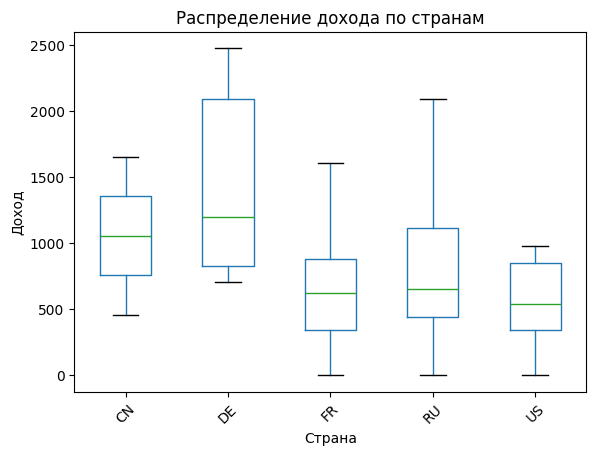

In [6]:
plt.figure(figsize=(12, 6))
df.boxplot(column='revenue', by='country', grid=False)
plt.title('Распределение дохода по странам')
plt.suptitle('')  
plt.xlabel('Страна')
plt.ylabel('Доход')
plt.xticks(rotation=45)
plt.savefig('figures/boxplot.png', dpi=300, bbox_inches='tight')
plt.show()

По боксплоту мы видим, что самый высокий медианный доход у Германии, наибольший расзброс наблюдается у России, самый стабильный у Китая, самый низкий медианный доход у США при относительно компактном распределении.

scatter plot (диаграмма рассеяния)

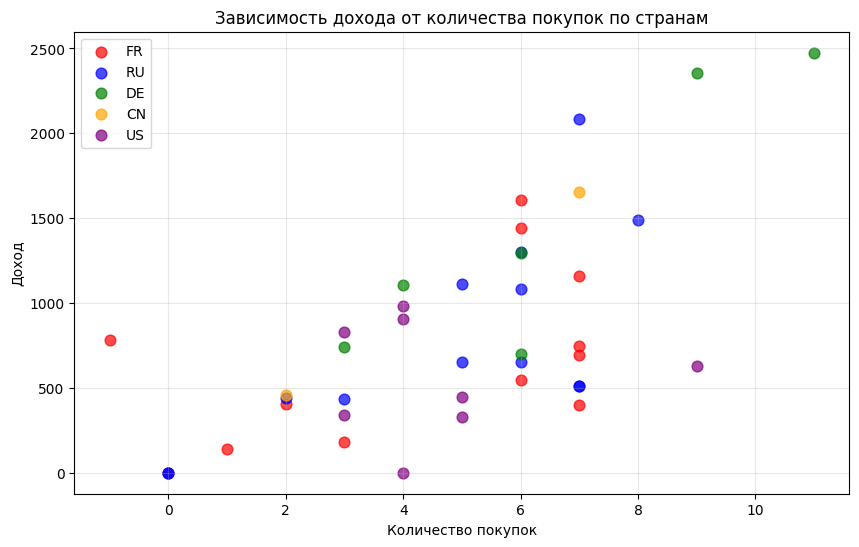

In [ ]:
plt.figure(figsize=(10, 6))

# Разные цвета для разных стран
countries = df['country'].unique()
colors = ['red', 'blue', 'green', 'orange', 'purple']

for i, country in enumerate(countries):
    country_data = df[df['country'] == country]
    plt.scatter(country_data['purchases'], country_data['revenue'], 
               c=colors[i], label=country, alpha=0.7, s=60)

plt.xlabel('Количество покупок')
plt.ylabel('Доход')
plt.title('Зависимость дохода от количества покупок по странам')
plt.legend()
plt.grid(True, alpha=0.3)
plt.savefig('figures/scatterplot.png', dpi=300, bbox_inches='tight')
plt.show()

Анализ диаграммы рассеяния показывает наличие положительной корреляции между доходом и количеством покупок - с увеличением числа покупок наблюдается рост дохода. При этом выделяются характерные паттерны по странам: пользователи из России и Франции демонстрируют широкий разброс значений, немецкие пользователи характеризуются высоким уровнем дохода, а американские - низким средним доходом, но с отдельными случаями большого количества покупок. Также на диаграмме видны аномалии данных, включая пользователя с отрицательным количеством покупок и случаи наличия покупок при нулевом доходе, что требует дополнительной проверки на корректность данных.